# Proyecto 2 

github: [link aqui](https://github.com/DanielRasho/MD-Proyecto2)

## Imports

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score,mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, explained_variance_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
# from statsmodels.graphics.gofplots import qqplot
import setuptools.dist
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
# import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest

## Cargado de datos


In [3]:
df = pd.read_csv('./data/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Limpieza de datos

Primero, se realiza una descripción del dataset para obtener un resumen estadístico de los datos. Esto nos permite identificar la distribución de las variables, sus valores mínimos y máximos, la media, la mediana y la desviación estándar. Además, nos ayuda a detectar posibles valores atípicos y comprender mejor la escala de los datos antes de realizar cualquier limpieza o transformación.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Primero, es importante eliminar las filas que contienen datos incompletos. Para ello, contaremos cuántos valores nulos hay en cada columna. Esto nos permitirá determinar si la cantidad de filas con valores faltantes es insignificante. Si encontramos columnas con un número excesivo de valores nulos (según nuestro criterio, más de 40), estas deberán ser eliminadas.

In [5]:
# Encontrar las columnas que tienen los mayores valores nulos
NAValues = [(col, count, (count / len(df)) * 100) for col, count in df.isnull().sum().items() if count > 0]

NAVariablesStats = pd.DataFrame(NAValues, columns=["Variable", "Count", "Percentage"])
NAVariablesStats = NAVariablesStats.sort_values("Count", ascending=False)
NAVariablesStats

,Variable,Count,Percentage
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
2,MasVnrType,872,59.726027
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945


### Criterios de eliminacion de columnas

Dado que el dataset contiene una gran cantidad de datos, primero realizamos una búsqueda para identificar las columnas con al menos un valor nulo. Posteriormente, analizamos el porcentaje de valores faltantes en cada una de estas columnas. Si el porcentaje de datos nulos era significativo (considerado alto según nuestro criterio), decidimos eliminarlas para evitar sesgos en el análisis y mejorar la calidad de los datos.

### Columas eliminadas
Las siguientes columnas fueron eliminadas debido a su alto porcentaje de valores nulos, tanto en training como testing:

* PoolQC → 99.52% de datos nulos.
* MiscFeature → 96.30% de datos nulos.
* Alley → 93.77% de datos nulos.
* Fence → 80.75% de datos nulos.
* MasVnrType → 59.73% de datos nulos.
* FireplaceQu → 47.26% de datos nulos.
* GarageQual → 5.55% de datos nulos.
* Id -> Es una variable insignificante que no nos aporta nada.

### Posteriormente

Al ya no existir columnas con un alto numero de valores nulos, ya nos podemos deshacer de las filas que estan incompletas.

In [6]:
# Quitar las columnas con mayor porcentaje de nulos
df.drop(['Id', "Alley", "MasVnrType", "FireplaceQu", "GarageQual", "PoolQC", "Fence", "MiscFeature" ], axis=1, inplace=True)
# Ahora ya se pueden quitar las filas con NA porque son muy pocos
df_cleaned = df.dropna()

In [7]:
# Asegurar que no hayan valores nulos
NAValues = list(df_cleaned.isnull().sum() / len(df_cleaned))
list(value for value in NAValues if value > 0)

[]

Después de obtener un dataset más limpio, el siguiente paso fue analizar su estructura con mayor detalle. Para ello, verificamos la cantidad de filas y columnas restantes, lo que nos permitió entender la dimensión de los datos después del proceso de limpieza.

Además, realizamos una nueva inspección en busca de datos duplicados, junto con los tipos de datos para tener una mejor compresion y asi para evitar cualquier tipo de sesgo.

In [8]:
print("=====Dataset limpio====")
print("Shape: ",df_cleaned.shape)
print("Duplicados: ",df.duplicated().sum())
print(df_cleaned.dtypes.value_counts())

=====Dataset limpio====
Shape:  (1094, 73)
Duplicados:  0
object     36
int64      34
float64     3
Name: count, dtype: int64


Se puede observar que poco menos de 1/3 de las observaciones en el dataset fue eliminado por la presencia de datos N/A que no se cree aportaran a la predicción.

### Análisis exploratorio

A continuación se investigara más sobre patrones que emergen del set de datos. Para ello primero es indispensables unir los datos en un solo data set, para ello __se ignorara la columan de precios__

In [9]:
allData = pd.concat([df_cleaned, df_cleaned], ignore_index=True)

allData.shape

(2188, 73)

Empezaremos por separar a las variables numericas de las qualitativas

In [10]:
numeric_cols = df.select_dtypes(include=['number']).columns

categorical_cols = df.select_dtypes(exclude=['number']).columns

print("====== Variables Numéricas =======\n")
print("Conteo:", len(numeric_cols))
print("Numeric Columns:", numeric_cols)
print("====== Variables Categóricas =======\n")
print("Conteo:", len(categorical_cols))
print("Categorical Columns:", categorical_cols)

====== Variables Numéricas =======

Conteo: 37
Numeric Columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
====== Variables Categóricas =======

Conteo: 36
Categorical Columns: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Founda

__¿Cuales son los valores más comunes para las variables categóricas?__

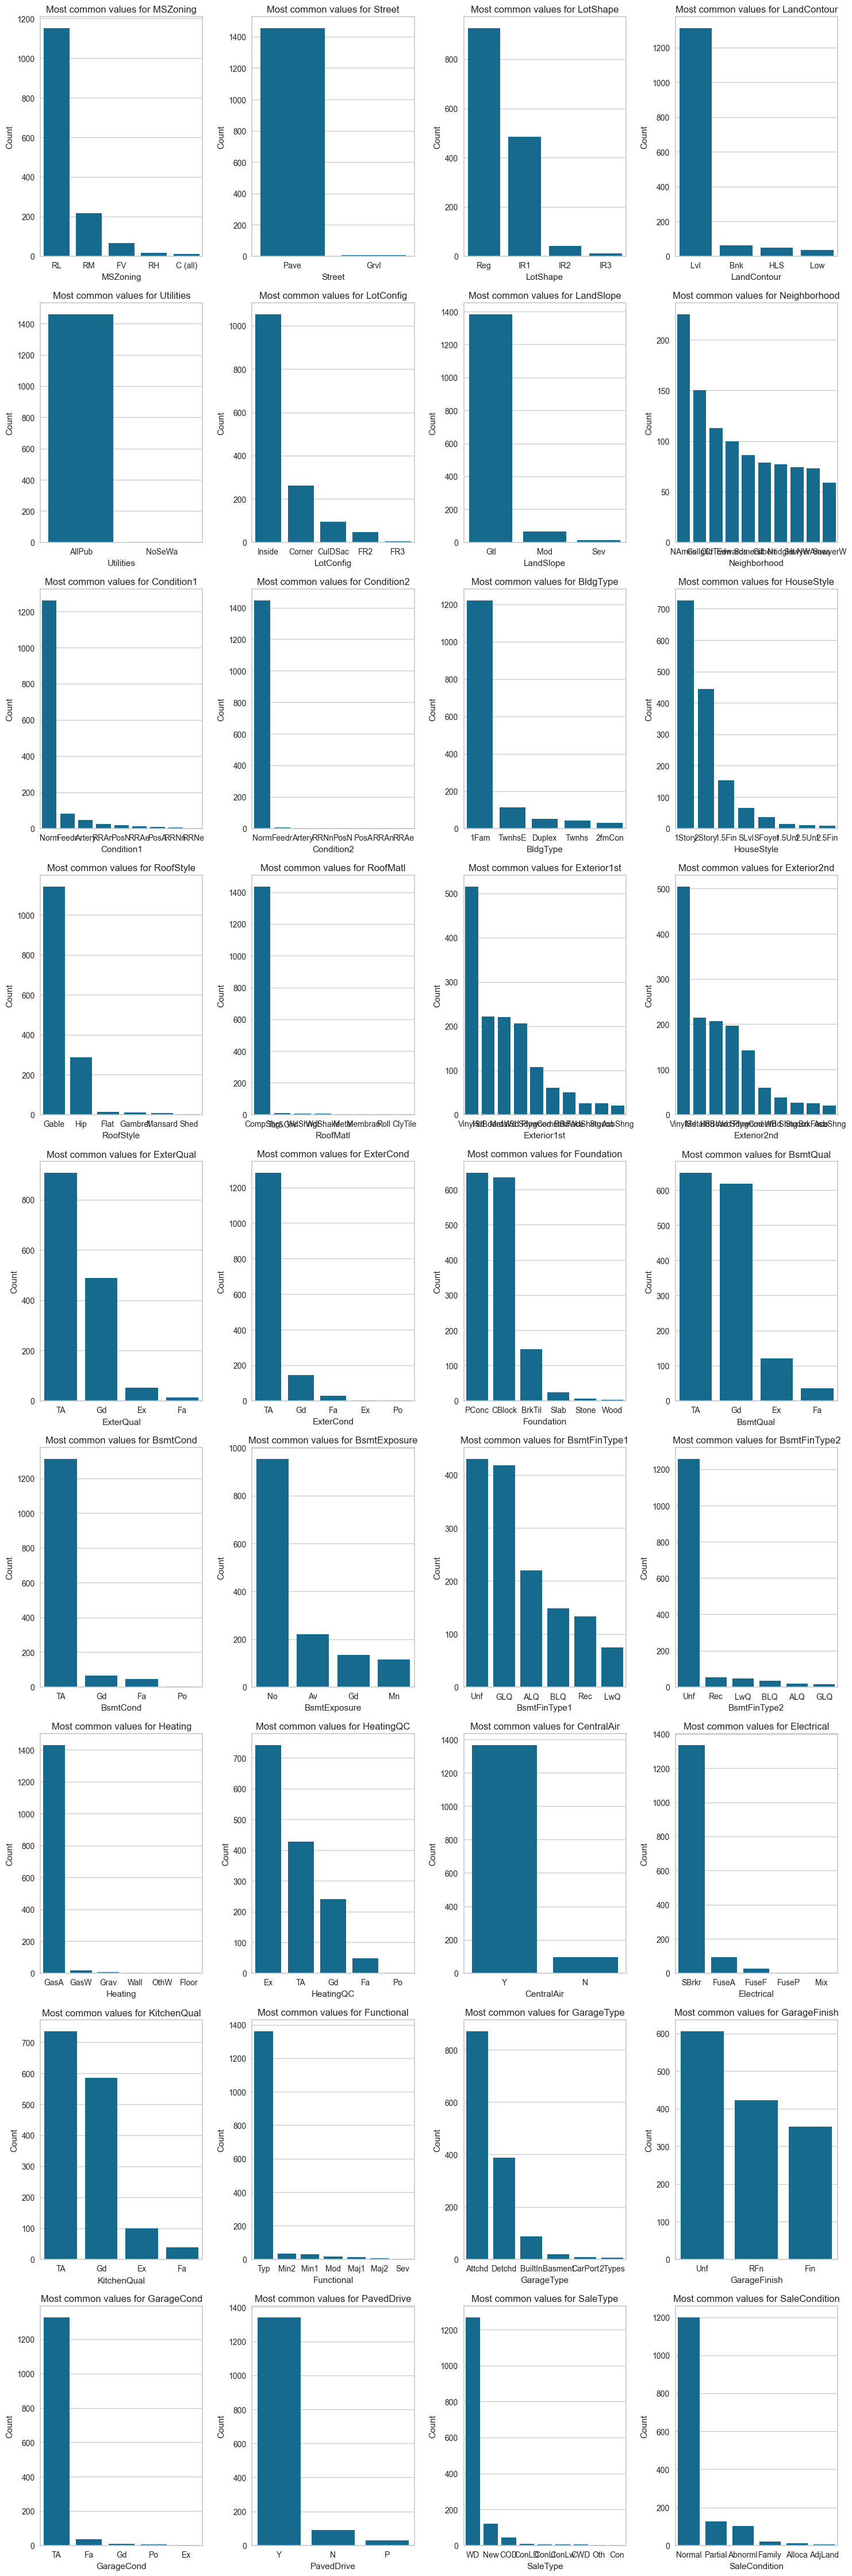

In [11]:
# Set the figure size and number of rows/columns based on the number of variables
num_vars = len(categorical_cols)
num_cols = 4
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each categorical variable
for i, var in enumerate(categorical_cols):
    # Plot the top 10 most frequent categories
    sns.countplot(data=df, x=var, ax=axes[i], order=df[var].value_counts().index[:10])
    
    # Set plot title and labels
    axes[i].set_title(f"Most common values for {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

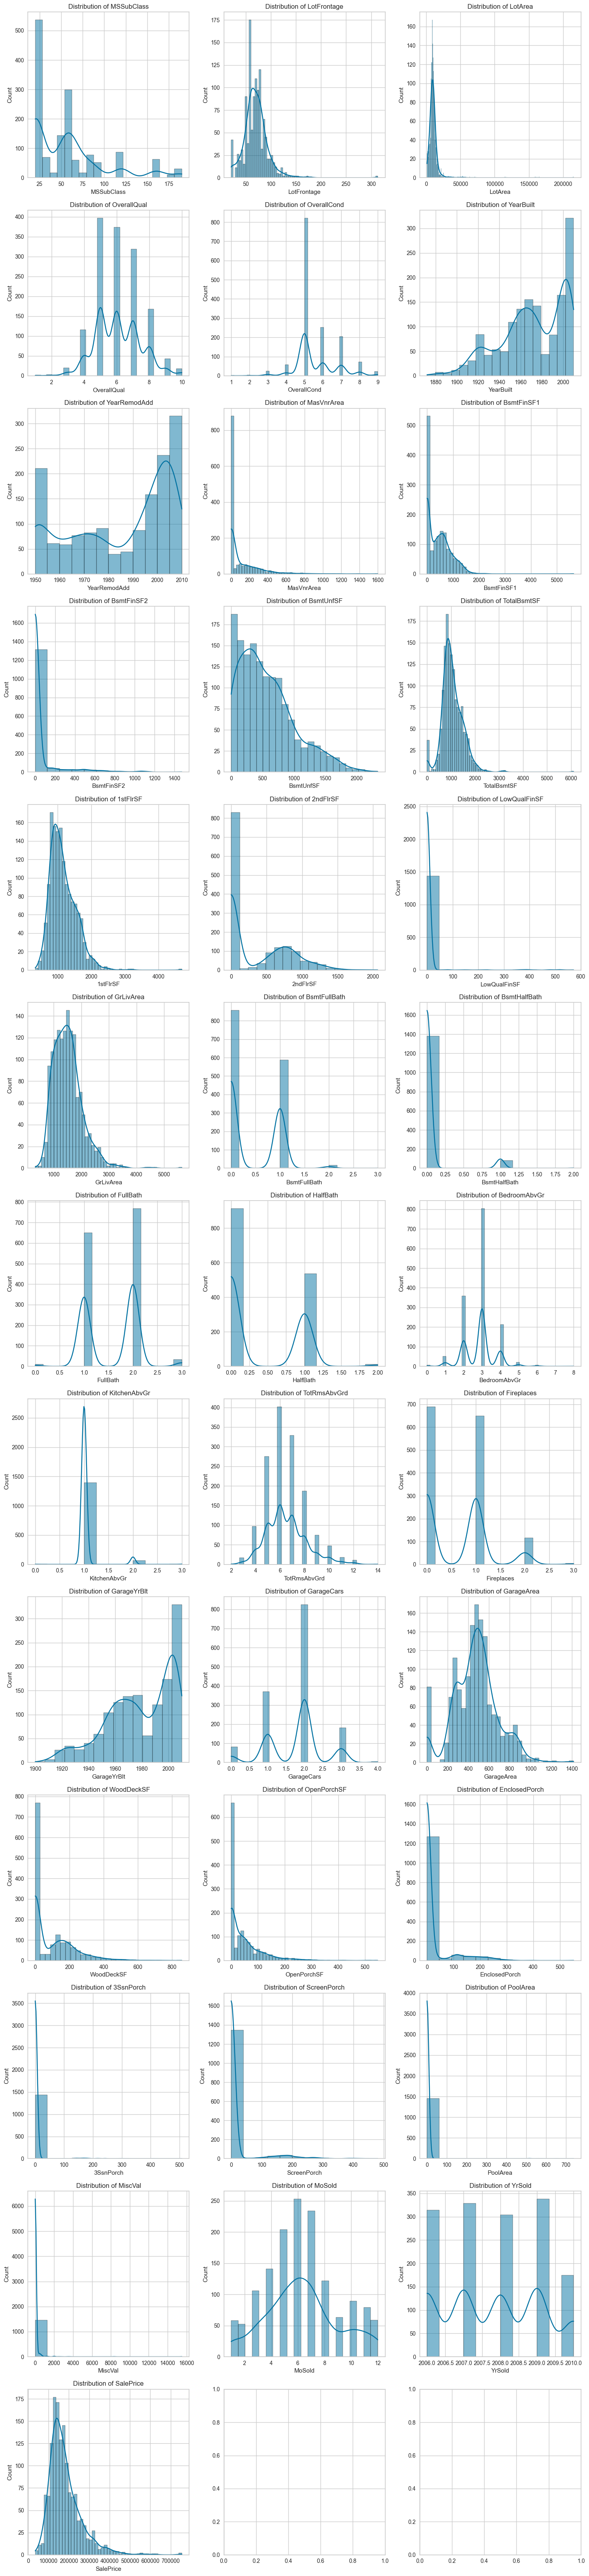

In [12]:
# Set the figure size and number of rows/columns based on the number of variables
num_vars = len(numeric_cols)
num_cols = 3  # You can adjust this number to fit your screen/figure
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each variable and plot it in the corresponding subplot
for i, var in enumerate(numeric_cols):
    sns.histplot(df[var], kde=True, ax=axes[i])

    # Set the plot title
    axes[i].set_title(f"Distribution of {var}")
    
    # Adjust the x-axis scale to fit the data range
    x_min, x_max = df[var].min(), df[var].max()
    buffer = (x_max - x_min) * 0.05  # 5% buffer on each side (can adjust the factor)
    axes[i].set_xlim(x_min - buffer, x_max + buffer)
    
    # Adjust the y-axis scale to fit the plot
    axes[i].set_ylim(0, axes[i].get_ylim()[1])  # Keep y-axis auto-scaling but prevent negative values

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Se puede observar que en resultados numericos, las variables de SalePrice, garage area, totalBSMFT, parkingLotArea, estan distribuidas normalmente, mientras que otras a pesar de ser numericas, parecen funcionar más como una variable categorica como el "número de pisos". 

Por otro lado para las varaibles cuantitativas se descubrio datos interesante de su frecuencia, como que la casa promedio, suele tener función de concreto o cemento, un sistema eléctrico estándar, no estan terminadas de construir cuando el usuario las compra, y son de un nivel.

__Como varia el coste venta entre diferentes vecinarios?__

Vecintarios como niridgHt o StoneBr son los que tienen mayores rangos de precios, pero tambien aquellos con más varianza, asi que a pesar de ser vecindarios caros, cuenatn con viviendas accesibles. De lo contrario gran cantidad de los barrios tienen poca variabilidad ($100000 de diferencia entre la vivienda mas barata y la mas cara aproximadamente.) y suelen estar en los precios mas bajos.

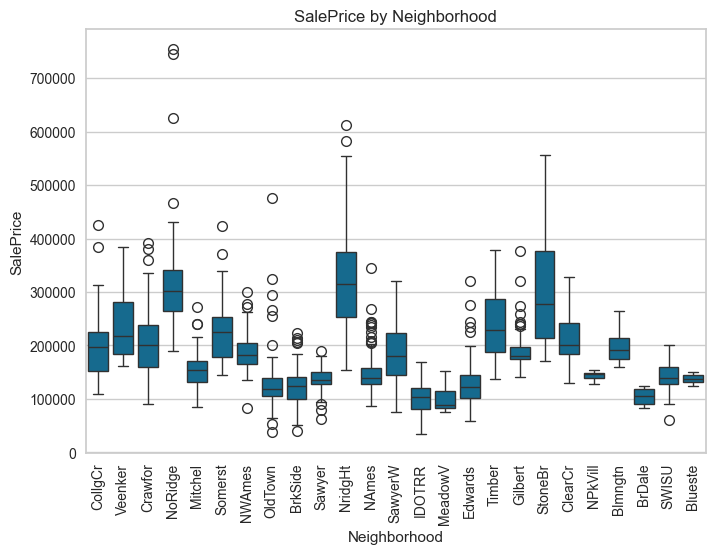

In [13]:
# Boxplot to see SalePrice across different Neighborhoods
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.title("SalePrice by Neighborhood")
plt.xticks(rotation=90)
plt.show()

__¿Estará el tiempo de venta relacionado en las ventas?__
Por el diagrama de cajas y bigotes, podemos ver que las cajas se traslapan mucho, tanto entre meses como años, lo que indica que el mes y año no afecta de forma importante el precio de las ventas.

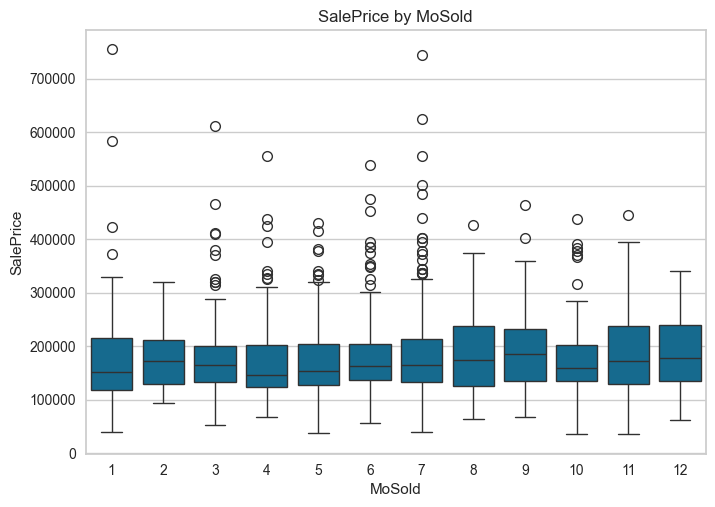

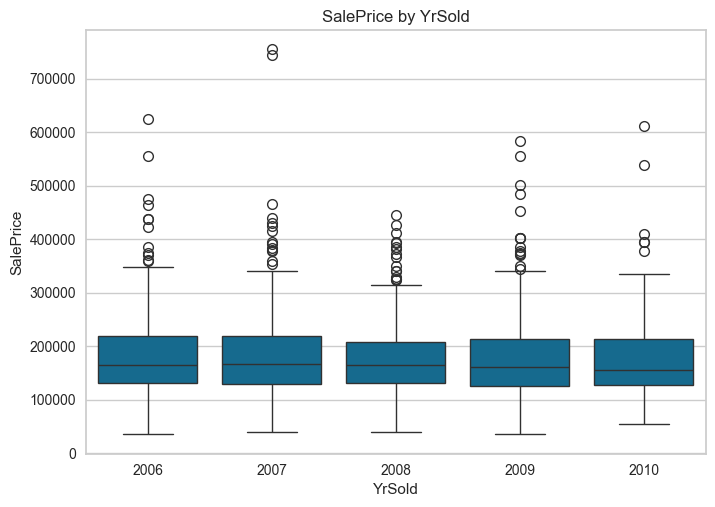

Average SalePrice by Year:
YrSold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: SalePrice, dtype: float64


In [14]:
# Boxplot for MoSold vs SalePrice
sns.boxplot(x='MoSold', y='SalePrice', data=df)
plt.title("SalePrice by MoSold")
plt.show()

# Boxplot for YrSold vs SalePrice
sns.boxplot(x='YrSold', y='SalePrice', data=df)
plt.title("SalePrice by YrSold")
plt.show()

# Checking trends by year
sale_by_year = df.groupby('YrSold')['SalePrice'].mean()
print(f"Average SalePrice by Year:\n{sale_by_year}")

__¿Son casas más grandes mas costosas?__

De acuerdo a la gráfica inferior se puede concluir que, si, normalmente las casas mas grande son más caras, ciendo su superficia cuadrada predictora de un 70% del precio.

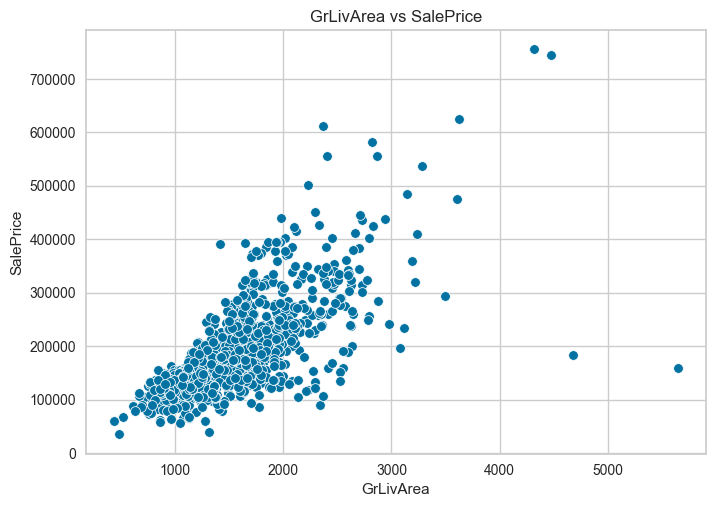

Correlation between GrLivArea and SalePrice: 0.7074814244872484


In [15]:
# Scatterplot for GrLivArea vs SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_cleaned)
plt.title("GrLivArea vs SalePrice")
plt.show()

# Checking correlation
print(f"Correlation between GrLivArea and SalePrice: {df_cleaned['GrLivArea'].corr(df_cleaned['SalePrice'])}")

### Análisis de grupos

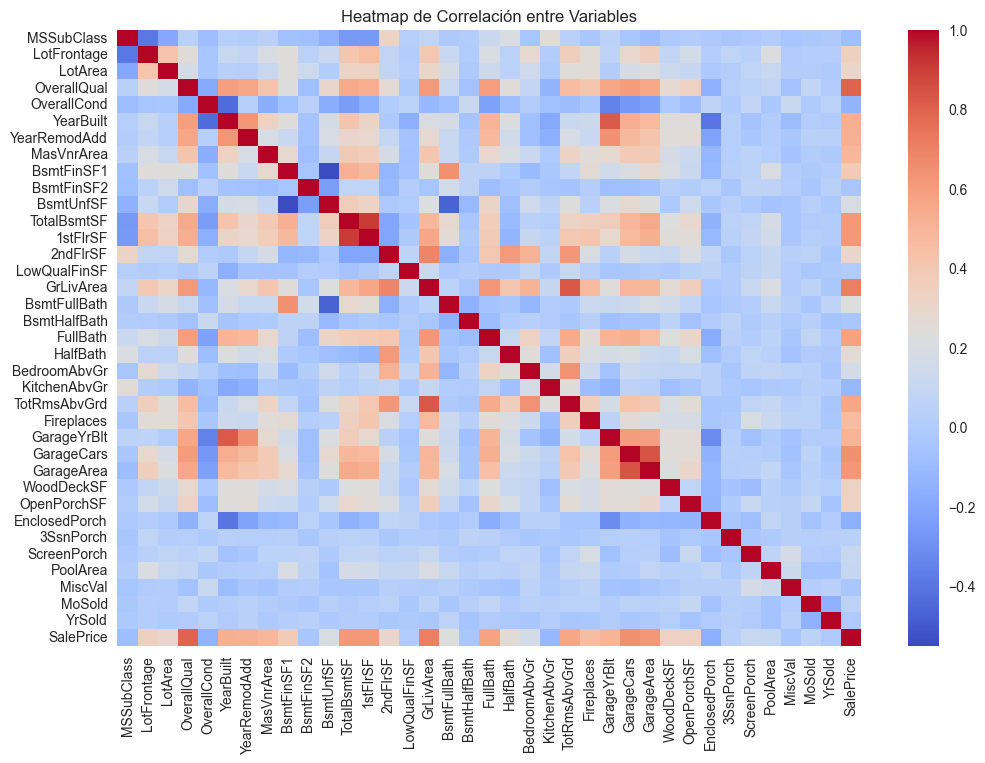

In [16]:
df_numeric = df_cleaned.select_dtypes(include=['int64', 'float64'])

correlation_matrix = df_numeric.corr()

# Graficar el heatmap de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")

plt.title("Heatmap de Correlación entre Variables")
plt.show()

In [17]:
# Normalizacion de los datos númericos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

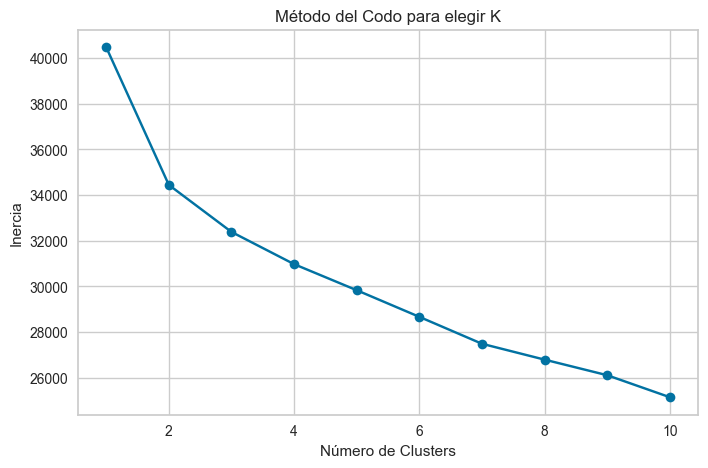

In [18]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Gráfica del "Elbow Method"
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo para elegir K")
plt.show()

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_numeric["Cluster"] = kmeans.fit_predict(df_scaled)

In [20]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_numeric, df_numeric["Cluster"])
print(f"Puntuación de Silueta: {silhouette_avg:.4f}")


Puntuación de Silueta: 0.3608


In [21]:
cluster_summary = df_numeric.groupby("Cluster").mean()
cluster_summary.T

Cluster,0,1,2
MSSubClass,53.796642,64.381313,43.672840
LotFrontage,66.082090,68.002525,92.975309
LotArea,8881.680970,9295.436869,16316.129630
OverallQual,5.277985,6.803030,8.098765
OverallCond,5.994403,5.121212,5.302469
YearBuilt,1949.240672,1995.654040,1992.265432
YearRemodAdd,1972.667910,1998.085859,2000.000000
MasVnrArea,50.817164,99.020202,331.679012
BsmtFinSF1,375.602612,378.664141,858.320988
BsmtFinSF2,58.850746,30.941919,35.240741


El análisis de clustering en el dataset muestra que los datos no se agrupan en clusters bien diferenciados. La puntuación de silueta de 0.36 indica un alto solapamiento entre grupos, lo que sugiere que no existen patrones claros. Esto se debe a que el dataset está diseñado para predicción de precios mediante regresión, ya que factores como la ubicación, el tamaño y la calidad de construcción afectan el precio de manera continua, en lugar de formar grupos homogéneos. Además, K-Means asume que los clusters tienen formas esféricas y distribuciones similares, lo que no es adecuado para estos datos.

### Division de dataset

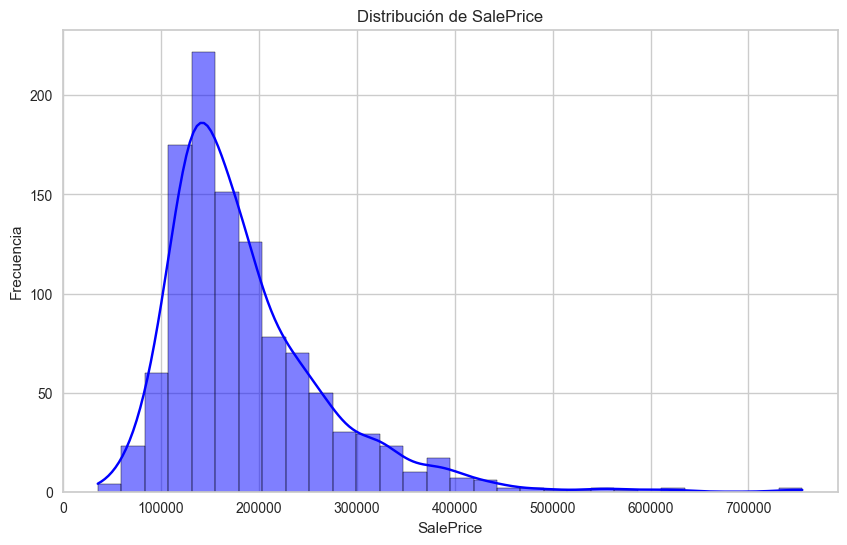

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["SalePrice"], bins=30, kde=True, color="blue")
plt.xlabel("SalePrice")
plt.ylabel("Frecuencia")
plt.title("Distribución de SalePrice")
plt.show()


El histograma muestra que la variable SalePrice (la cual es nuestra variable objetivo) está sesgada a la derecha, lo que significa que hay más casas con precios bajos y menos casas con precios muy altos. Esto sugiere que los datos no están distribuidos de manera no uniforme y que existen outliers en el extremo derecho. Procederemos a hacer una division estratificada para evitar cualquier tipo de sesgo.

In [37]:
df_cleaned["TotalSF"] = df_cleaned["TotalBsmtSF"] + df_cleaned["1stFlrSF"] + df_cleaned["2ndFlrSF"]

C:\Users\Gerax\AppData\Local\Temp\ipykernel_18832\1105460879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["TotalSF"] = df_cleaned["TotalBsmtSF"] + df_cleaned["1stFlrSF"] + df_cleaned["2ndFlrSF"]


Se necesita calcular el total de metros cuadrados de la casa debido a que la variable que ya existe llamda GrLivArea, esto solo toma en cuenta los metros cuadrados arriba del suelo, por lo que si la casa tuviera sotano esta variable lo obviaria.

In [38]:
# Crear cuartiles de precios (se pueden ajustar los rangos según el dataset)
df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=4, labels=["Bajo", "Medio-Bajo", "Medio-Alto", "Alto"])

# División estratificada
train_set, test_set = train_test_split(df_cleaned, test_size=0.2, random_state=42, stratify=df_cleaned["SalePriceCategory"])


C:\Users\Gerax\AppData\Local\Temp\ipykernel_18832\1498141306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["SalePriceCategory"] = pd.qcut(df_cleaned["SalePrice"], q=4, labels=["Bajo", "Medio-Bajo", "Medio-Alto", "Alto"])


De esta manera nos quedamos dos grupos de datos en una proporción 80-20 de entrenamiento y testeo respectivamente. A continuación podemos ver que el muestro estratíficado dio resultados, al mantener la proporción de casas en 4 diferentes tipos de precios:

- Bajo
- Medio-Bajo
- Medio-Alto
- Alto

In [39]:
# Verificar la proporción en cada conjunto
print("====== Train Set ======")
print(train_set["SalePriceCategory"].value_counts(normalize=True))
print()
print("====== Test Set ======")
print(test_set["SalePriceCategory"].value_counts(normalize=True))


====== Train Set ======
SalePriceCategory
Bajo          0.253714
Medio-Alto    0.250286
Alto          0.250286
Medio-Bajo    0.245714
Name: proportion, dtype: float64

====== Test Set ======
SalePriceCategory
Bajo          0.255708
Medio-Alto    0.251142
Medio-Bajo    0.246575
Alto          0.246575
Name: proportion, dtype: float64


La distribución de SalePrice se mantiene estable en ambos conjuntos, evitando sesgos en el modelo. Si la división hubiera sido aleatoria sin estratificación, podria haber resultado en un conjunto de prueba con más casas de precio bajo o alto, afectando el aprendizaje del modelo, pudiendo llegar a sesgarlo. 

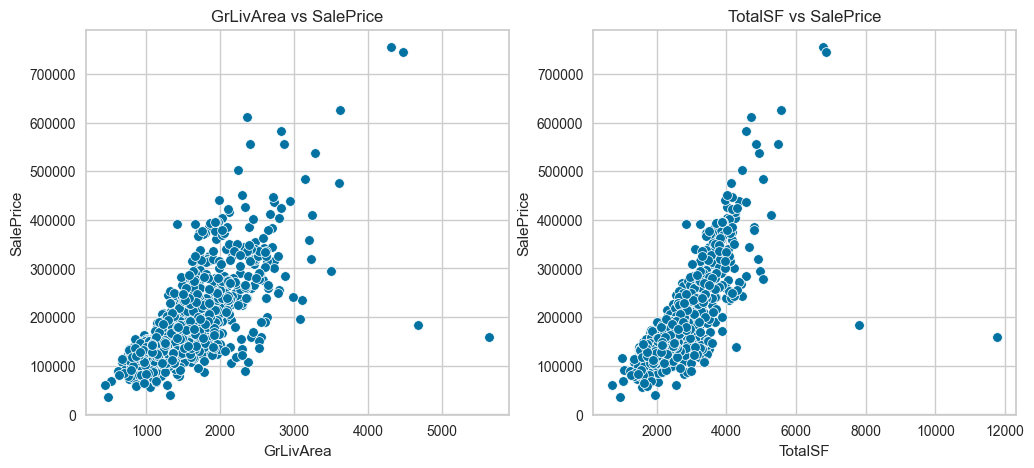

In [40]:
# Comparar la relación entre SalePrice y diferentes variables de área
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df_cleaned["GrLivArea"], y=df_cleaned["SalePrice"])
plt.title("GrLivArea vs SalePrice")

plt.subplot(1, 2, 2)
sns.scatterplot(x=df_cleaned["TotalSF"], y=df_cleaned["SalePrice"])
plt.title("TotalSF vs SalePrice")

plt.show()

Ambas graficas muestran la relacion entre el precio de venta y una variable que representa el tamaño de la casa. Se puede observar como ambas graficas tienen tendencias positiva. GrLivArea representa datos mas dipersos y parece tener una buena relacion pero esta incompleta porque le faltan los sotanos. En cambio TotalSF tiene datos mas concentrados , siguien existiendo los valores atipicos pero esta tiene una relacion mas clara.

In [41]:
# Seleccionar solo variables numéricas
df_numeric = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Calcular correlación con SalePrice
correlation_matrix = df_numeric.corr()

# Ordenar de mayor a menor correlación con SalePrice
correlation_with_price = correlation_matrix["SalePrice"].sort_values(ascending=False)
correlation_with_price

SalePrice        1.000000
OverallQual      0.795437
TotalSF          0.773672
GrLivArea        0.707481
GarageCars       0.652103
GarageArea       0.620772
TotalBsmtSF      0.617741
1stFlrSF         0.617692
FullBath         0.578299
TotRmsAbvGrd     0.560521
YearBuilt        0.523434
YearRemodAdd     0.519806
GarageYrBlt      0.502248
MasVnrArea       0.485409
Fireplaces       0.458182
BsmtFinSF1       0.378678
LotFrontage      0.343978
OpenPorchSF      0.338600
WoodDeckSF       0.330286
2ndFlrSF         0.302569
LotArea          0.302268
HalfBath         0.259469
BsmtFullBath     0.223948
BsmtUnfSF        0.191247
BedroomAbvGr     0.168489
ScreenPorch      0.106479
PoolArea         0.092085
MoSold           0.052584
3SsnPorch        0.033947
LowQualFinSF    -0.003541
YrSold          -0.006723
MiscVal         -0.036001
BsmtFinSF2      -0.036923
BsmtHalfBath    -0.041341
MSSubClass      -0.089478
KitchenAbvGr    -0.115382
OverallCond     -0.138511
EnclosedPorch   -0.161711
Name: SalePr

Al analizar la relación entre las variables y el precio de venta, se seleccionaron aquellas con una correlación r > 0.6, ya que representan las características con mayor impacto en el valor final de la propiedad. Las variables con una correlación entre 0.3 < r < 0.6 también pueden aportar información útil, aunque su influencia es menor.

Con base en este criterio, las variables seleccionadas para el modelo son:
- OverallQual
- TotalSF
- GarageCars
- FullBath
- YearRemodAdd
- Fireplaces

Algunas variables con r > 0.6 por contar con **multicolinealidad**. Por ejemplo, GrLivArea, TotalBsmtSF y 1stFlrSF ya están representadas en TotalSF, por lo que fueron descartadas. De manera similar, aunque GarageArea tiene una correlación significativa con SalePrice, se prefirió GarageCars, ya que tiene una relación más fuerte y representa mejor la capacidad del garaje. El año de construcción tambien fue ignorado a favor del año de remodelación.

## Analisis de correlación

### Modelado univariado

Del analisis previo de variables se decidio que se usará los pies cuadrados totales como principal predictor del precio para un primer modelo univariado. A continuación se muestran los pasos:

**1. Entrenamiento de modelo**

In [42]:
univariateModel = LinearRegression()

X_Variable = "TotalSF"
Y_Variable = "SalePrice"

TotalBsmt = train_set[X_Variable].values.reshape(-1,1)
TotalBsmt_Test = test_set[X_Variable].values.reshape(-1,1)
SalePrice = train_set[Y_Variable].values.reshape(-1,1)
SalePrice_Test = test_set[Y_Variable].values.reshape(-1,1)

univariateModel.fit(TotalBsmt, SalePrice)
salePricePrediction = univariateModel.predict(TotalBsmt_Test)

**2. Ecuación linear del modelo**

In [43]:
#y = mx + c
m = univariateModel.coef_[0][0]
c = univariateModel.intercept_[0]

label = r'$SalePrice = (%0.4f)(metrosCuadrados) %+0.4f'%(m,c)
print(label)

$SalePrice = (80.2970)(metrosCuadrados) -23472.1864


**3. Resultados de la regresión**

MSE: 2618049055.72
R squared: 0.55


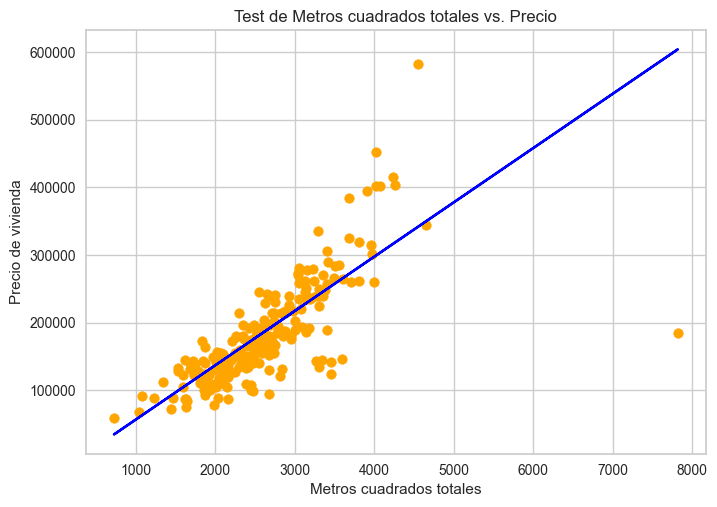

In [44]:
fig = plt.figure()
plt.scatter(TotalBsmt_Test, SalePrice_Test, color="orange")
plt.plot(TotalBsmt_Test, salePricePrediction ,color="blue")
plt.xlabel("Metros cuadrados totales")
plt.ylabel("Precio de vivienda")
plt.title("Test de Metros cuadrados totales vs. Precio")

print("MSE: %.2f"%mean_squared_error(SalePrice_Test,salePricePrediction))
print("R squared: %.2f"%r2_score(SalePrice_Test, salePricePrediction))

No hubieron resultados muy buenos, al tener un $R^2$ del 55%, lo que indica un ajuste, no muy bueno que tambien puede ser causado por datos atípicos como se pueden ver en la gráfica. Se puede concluir que el precio de la vivienda dependerá es explicado por más variables.

#### Análisis de residuales

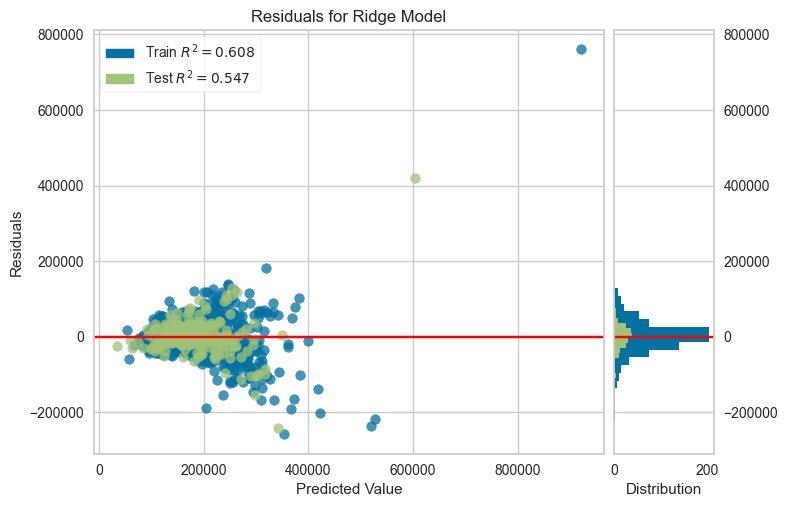

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [45]:
model = Ridge()
visualizer = ResidualsPlot(model, line_color="red")
SalePriceFlatten = train_set[Y_Variable].values.ravel()  # (875,) instead of (875, 1)
SalePriceFlatten_Test = test_set[Y_Variable].values.ravel()  # (875,) instead of (875, 1)

visualizer.fit(TotalBsmt,SalePriceFlatten)
visualizer.score(TotalBsmt_Test, SalePriceFlatten_Test)
visualizer.show()

# visualizer.score(TotalBsmt_Test,salePricePrediction)

La gráfica de residuales no muestra un patrón aleatorio alrededor de 0, más bien parece que los puntos tienden a error más a mayor valor de metros cuadrados totales, qué como se dijo antes puede estar motivado por los datos atípicos, aunque también es un indicador que un modelo diferente puede ser necesario.

NormaltestResult(statistic=array([139.51259962]), pvalue=array([5.07252172e-31]))


Text(0.5, 1.0, 'Residuales')

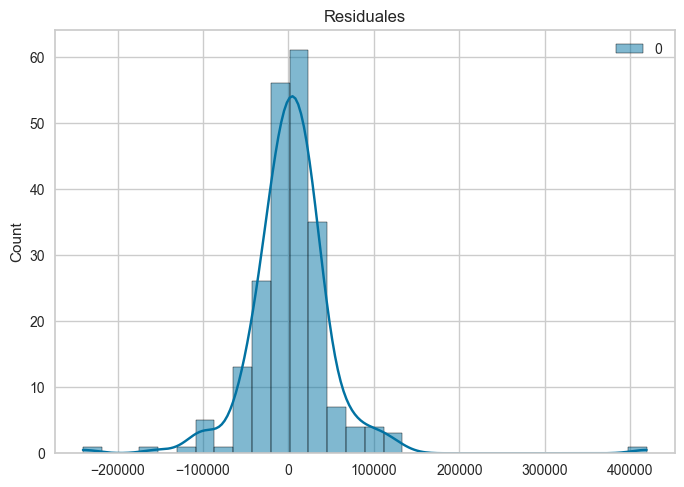

In [46]:
residuals = salePricePrediction - SalePrice_Test
print(normaltest(residuals))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.title("Residuales")

También se puede indicar que los residuales no siguen una distribución normal, y estan cesgados para la derecha, es decir que el modelo tiende a infravalorar la variable respuesta. Y triplemente comprobado cuando el modelo de menor error ordinario tambien regresa $R^2$ de 0.35, que es bajo. En conclusión este modelo no es buen predictor.

In [47]:
est = sm.OLS(SalePrice,TotalBsmt)
est2 = est.fit()
salePricePrediction = est2.predict(TotalBsmt_Test)

print("Test R squared:", r2_score(SalePrice_Test, salePricePrediction))

Test R squared: 0.5482112342584214


### Modelo Multivariado

Para este segundo modelo, se usaron más variables independendientes encontradas en secciones anteriores y de las que ya se verifico tienen alta correlación con la variable objetivo, y baja colinealidad entre ellas.

__1. Creacion de modelo__

In [48]:
multiVariantModel = LinearRegression()
numeric_variables = ["OverallQual", "TotalSF", "GarageCars", "FullBath", "YearRemodAdd", "Fireplaces"]

X_variables = train_set[numeric_variables].values
X_variables_Test = test_set[numeric_variables].values

multiVariantModel.fit(X_variables, SalePrice)
multiVariantPredict = multiVariantModel.predict(X_variables_Test)

In [49]:
sm.OLS(SalePrice, X_variables).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              3465.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):                        0.00
Time:                        01:29:22   Log-Likelihood:                         -10542.
No. Observations:                 875   AIC:                                  2.110e+04
Df Residuals:                     869   BIC:                                  2.112e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.611e+04   1593.440     16.385      0.000     2.3e+04    2.92e+04
x2            37.7493      2.606     14.488      0.000      32.635      42.863
x3          2.235e+04   2852.811      7.833      0.000    1.67e+04    2.79e+04
x4          1654.5322   3420.699      0.484      0.629   -5059.266    8368.330
x5           -62.5074      3.500    -17.857      0.000     -69.378     -55.637
x6          8495.3916   2552.678      3.328      0.001    3485.256    1.35e+04
==============================================================================
Omnibus:                      316.822   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30418.053
Skew:                          -0.643   Prob(JB):                         0.00
Kurtosis:                      31.856   Cond. No.                     8.52e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__2. Estudio de ajuste__

In [50]:
# calculate aic for regression 
def calculate_aic(n, mse, num_params):
 aic = n * np.log(mse) + 2 * num_params
 return aic
# calculate bic for regression
def calculate_bic(n, mse, num_params):
 bic = n * np.log(mse) + num_params * np.log(n)
 return bic
 
# Regression metrics
explained_variance_modelo1=explained_variance_score(SalePrice_Test, multiVariantPredict)
mean_absolute_error_modelo1=mean_absolute_error(SalePrice_Test, multiVariantPredict) 
mse_modelo1=mean_squared_error(SalePrice_Test, multiVariantPredict) 
#mean_squared_log_error_modelo1=mean_squared_log_error(SalePrice_Test, multiVariantPredict)
median_absolute_error_modelo1=median_absolute_error(SalePrice_Test, multiVariantPredict)
r2_modelo1=r2_score(SalePrice_Test, multiVariantPredict)
k = multiVariantModel.coef_.size
n = X_variables.shape[0]
aic_modelo1 = calculate_aic(n,mse_modelo1,k)
bic_modelo1 = calculate_bic(n,mse_modelo1,k)

print('explained_variance: ', round(explained_variance_modelo1,4))   
#print('mean_squared_log_error: ', round(mean_squared_log_error_modelo1,4))
print('r2: ', round(r2_modelo1,4))
print('MAE: ', round(mean_absolute_error_modelo1,4))
print('MSE: ', round(mse_modelo1,4))
print('RMSE: ', round(np.sqrt(mse_modelo1),4))
print('AIC: ',round(aic_modelo1,4))
print('BIC: ',round(bic_modelo1,4))

explained_variance:  0.7158
r2:  0.7114
MAE:  25728.3582
MSE:  1668798437.0603
RMSE:  40850.9295
AIC:  18592.9485
BIC:  18621.5938



Este modelo tuvo mucho mejor rendimiento que el basado en una sola variable (casi el doble comparado a los $R^2$=40% originales). Sin embargo todavía hay margen de mejora. El MAE y RMSE indica que las predicciones suelen estar desviadas ~$28k a ~$40k respectivamente, dolares de media, lo cual cual es significativo tomando en cuenta que gran parte de las viviendas comprenden precios entre los $100K a $300K


## Lasso

In [56]:
print(f"Tamaño del conjunto de entrenamiento: {X_variables.shape}")
print(f"Tamaño del conjunto de prueba: {X_variables_Test.shape}")


alpha_values = np.logspace(-3, 3, 100)  # Desde 0.001 hasta 1000

# Crear el modelo Lasso con validación cruzada
lasso_cv = LassoCV(alphas=alpha_values, cv=5)  # 5-fold cross-validation
lasso_cv.fit(X_variables, SalePrice.ravel())

# Obtener el mejor alpha encontrado
best_alpha = lasso_cv.alpha_
print(f"Mejor valor de α encontrado: {best_alpha:.6f}")

lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_variables, SalePrice.ravel())

lasso_predictions = lasso_model.predict(X_variables_Test)

mse_lasso = mean_squared_error(SalePrice_Test, lasso_predictions)
r2_lasso = r2_score(SalePrice_Test, lasso_predictions)
rmse_lasso = np.sqrt(mse_lasso)

n_test = X_variables_Test.shape[0]
aic_lasso = calculate_aic(n_test, mse_lasso, X_variables.shape[1])
bic_lasso = calculate_bic(n_test, mse_lasso, X_variables.shape[1])

# Comparar Resultados con Regresión Lineal
results_lasso_df = pd.DataFrame({
    "Modelo": ["Regresión Lineal Múltiple", "Lasso"],
    "R²": [r2_modelo1, r2_lasso],
    "MSE": [mse_modelo1, mse_lasso],
    "RMSE": [np.sqrt(mse_modelo1), rmse_lasso],
    "AIC": [aic_modelo1, aic_lasso],
    "BIC": [bic_modelo1, bic_lasso],
    "Mejor Alpha (Lasso)": [None, best_alpha]
})


print("\nComparación de Modelos con Lasso:")
# print(results_lasso_df)
results_lasso_df.T


Tamaño del conjunto de entrenamiento: (875, 6)
Tamaño del conjunto de prueba: (219, 6)
Mejor valor de α encontrado: 756.463328

Comparación de Modelos con Lasso:


,0,1
Modelo,Regresión Lineal Múltiple,Lasso
R²,0.711427,0.710784
MSE,1668798437.060316,1672518179.987615
RMSE,40850.929452,40896.432363
AIC,18592.948492,4663.033572
BIC,18621.593836,4683.368003
Mejor Alpha (Lasso),NaN,756.463328


La comparación entre Regresión Lineal Múltiple y Lasso muestra que ambos modelos tienen una precisión similar, con un coeficiente de determinación de aproximadamente 0.71 y valores de error cuadrático medio (MSE y RMSE) casi idénticos. Sin embargo, Lasso se destaca en términos de eficiencia y simplicidad, ya que su AIC (4,663.03) y BIC (4,683.37) son significativamente menores en comparación con la regresión lineal múltiple (AIC de 18,592.95 y BIC de 18,621.59). Esto indica que Lasso ha logrado reducir la complejidad del modelo al eliminar o reducir el impacto de variables menos relevantes, sin comprometer en gran medida la precisión. Además, la validación cruzada en Lasso determinó que el mejor valor de α es 756.46, lo que sugiere una penalización considerable sobre los coeficientes para evitar el sobreajuste.

## Ridge